In [1]:
import Zip
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import math
import pandas as pd

# Channels in the detector
det_ch = { 'tpc': list(range(0, 247+1)), 'veto': list(range(248, 253+1)), 
          'sum_wv': [254], 'busy_on': [255], 'busy_off': [256],
          'hev_on': [257], 'hev_off': [258], 'muon_veto_trigger': [259], } 
n_channels = 260

# The data files
NG = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/NG") # Neutron data
Rn220 = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/Rn220") # Rn-220 data

# Global params
#baseline = 16382.0
#std = 2.3

In [2]:
#The calibration data files
NG = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/NG") # Neutron data
Rn220 = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/Rn220") # Rn-220 data

In [3]:
# A waveform reader function
def Waveform(eventnr,file):
    event = file.get_single_event(eventnr)
                                
    #The variables that check if a channel is the minimum channel
    adcmin = 16382
    minchannel = 0
    
    #A list that holds all the channels with significant pulses 
    channellist = []
    
    #Create the datapoint arrays
    n = 500000  #350000
    ts = np.ones((n_channels, n), dtype=np.int16)
    ts = ts * 16382 #baseline
    t = np.linspace(0, n, n) 
    
    #Loop over all pulses in the event
    for p in event.pulses:
        ch = p.channel
        i = np.zeros(n_channels, dtype = int)
        #print(p.channel, ": ", p.left, p.right-p.left)
        data_list = [16382.,]
        
        for adc in p.raw_data:
            
            #Add the ADC value to the appropriate channel array
            ts[ch][p.left + i[ch]] = adc
            i[ch] = i[ch] + 1
            
            av = np.average(data_list)
            #Append all significant main channels to the list
            if adc/av < 0.99 and ch not in channellist and ch in det_ch['tpc']:
                channellist.append(ch)
                
            #Check which channel is the minimum channel
            if adc < adcmin:
                adcmin = adc
                minchannel = ch
            
            data_list.append(adc)
                
    #Sort for convenience
    channellist.sort()
    return t, ts, channellist, minchannel


In [ ]:
#Select the event number and process the waveform
eventnumber = 5
Input = Waveform(eventnumber,NG)
print(Input[2])
print(len(Input[2]))
print('The lowest recorded ADC reading for event %i occured in channel %i' % (eventnumber, Input[3]))

0
3
4
5
6
7
9
11
13
16
19
20
21
22
23
24
25
27
28
29
30
31


/usr/lib/python3/dist-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


32
33
35
36
37
38
39
40
41
42
43
44
46
47
48
49
50
51
52
53
54
55
57
58
59
60
61
63
64
66
67
68
69
70
71
72
74
75
76
77
78
80
81
82
83
84
85
87
89
90
91
92
93
94
95
96
97
98
99
100
101
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
119
120
121
122
123
124
125
126
127
128
129
131
132
133
136
138
140
141
142
143
144
145
146
147
149
151
153
154
155
156
157
158
159
160
161
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
179
180
181
182
184
185
186
187
188
189
191
192
193
194
195
196
197
199
200
201
202
203
204
205
207
208
209
210
211
212
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
235
236
237
238
240
241
242
243
245
246
247


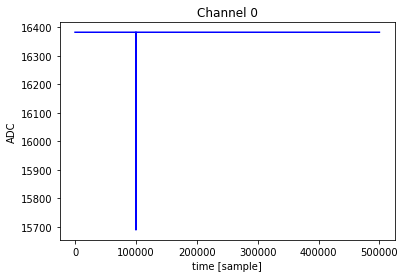

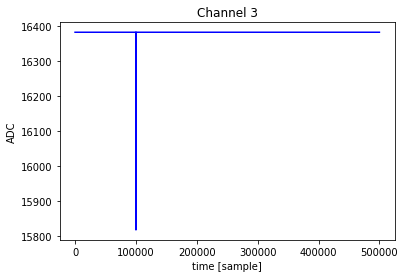

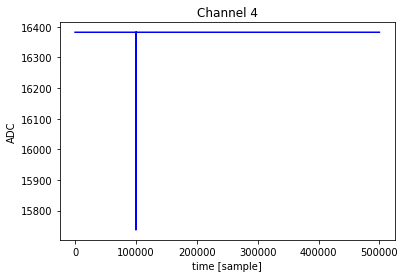

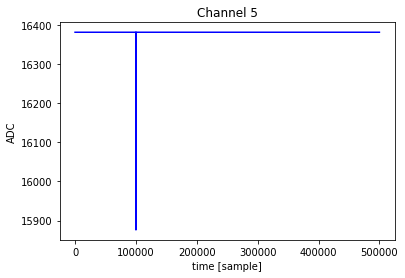

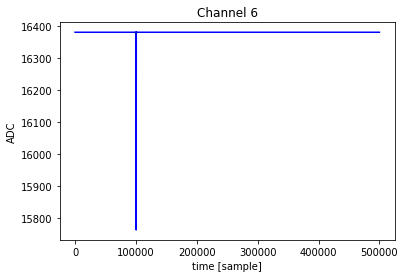

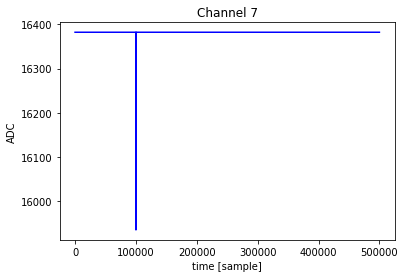

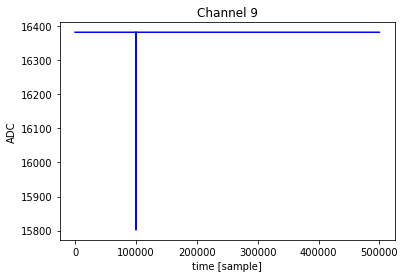

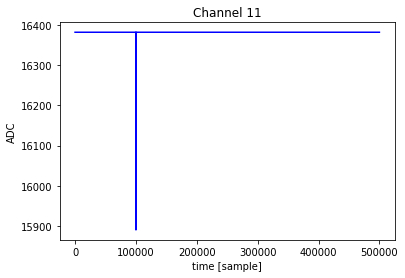

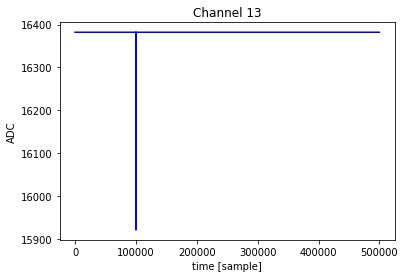

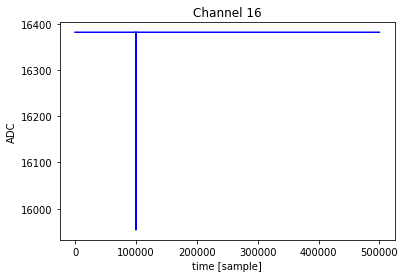

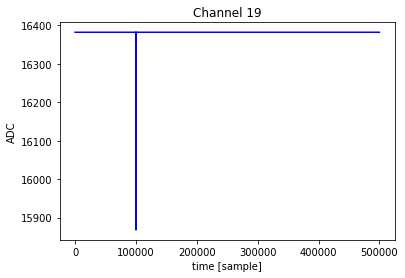

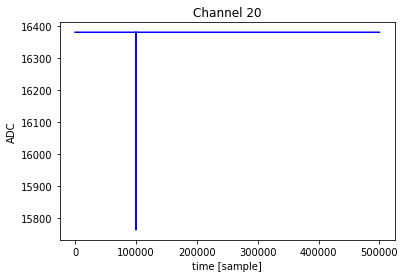

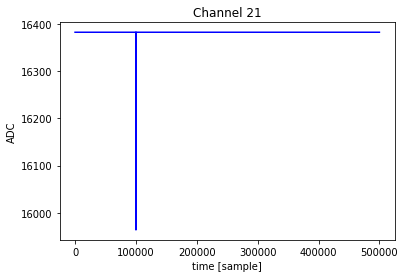

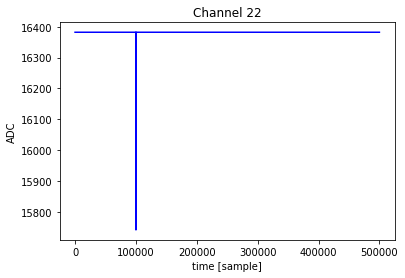

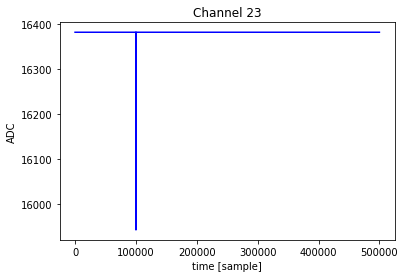

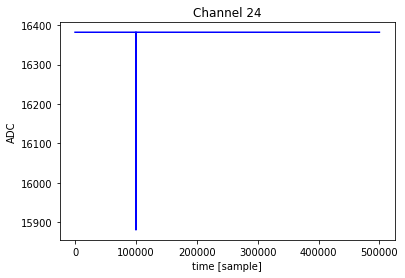

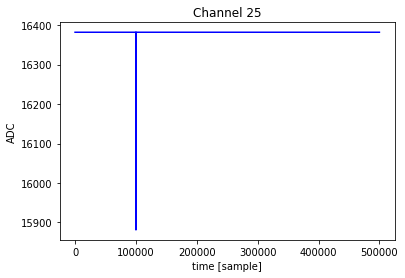

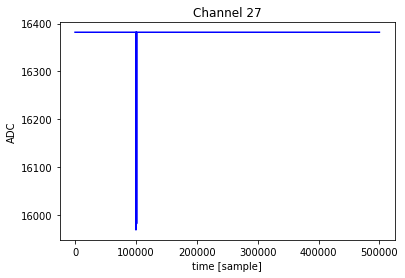

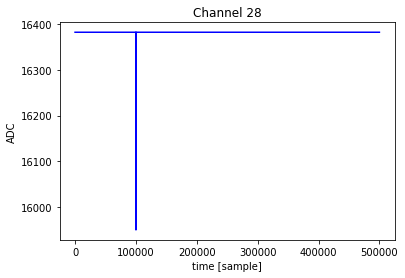

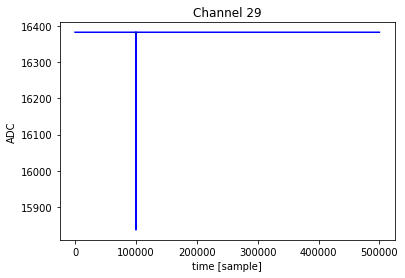

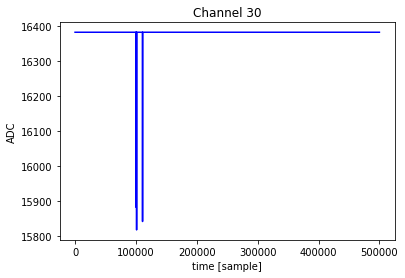

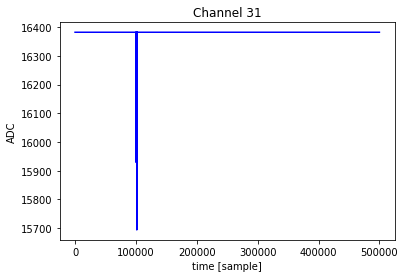

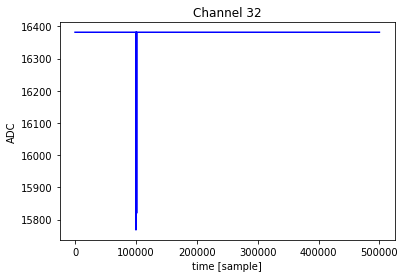

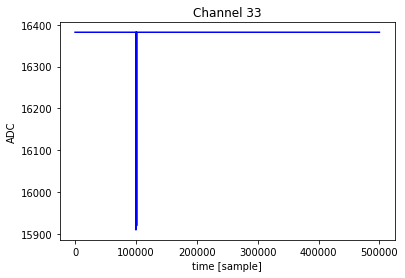

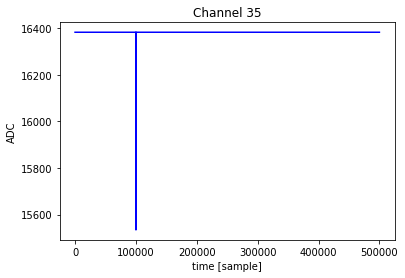

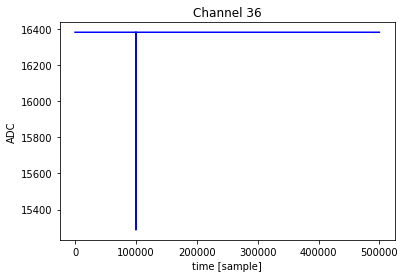

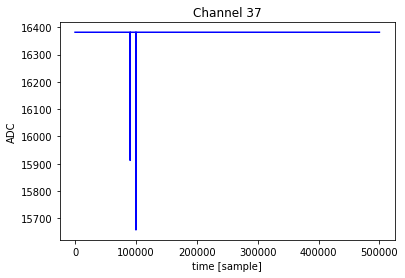

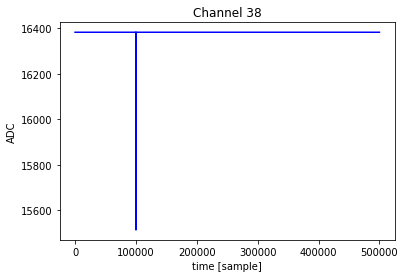

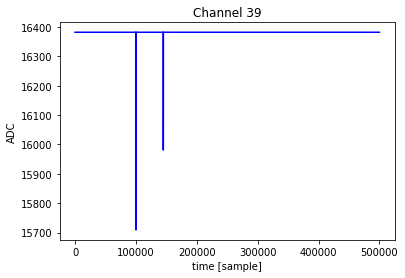

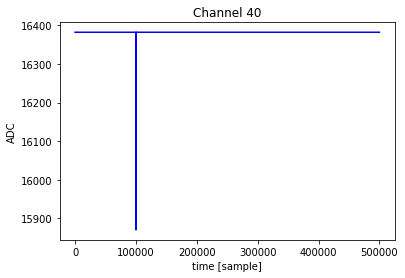

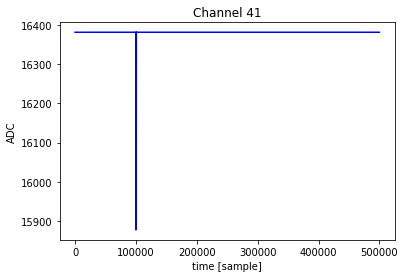

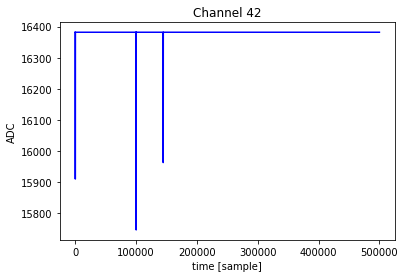

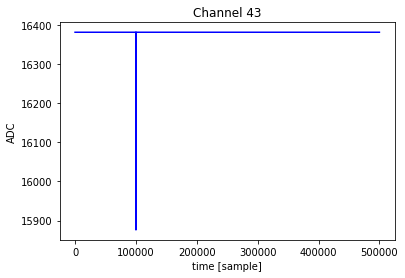

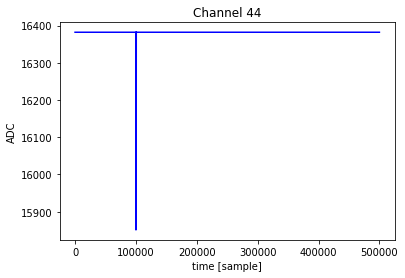

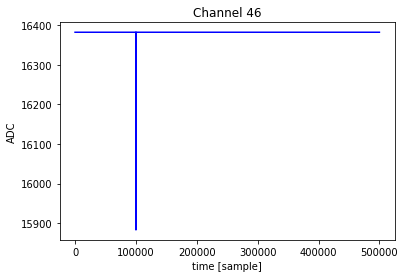

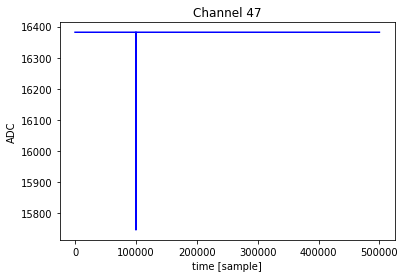

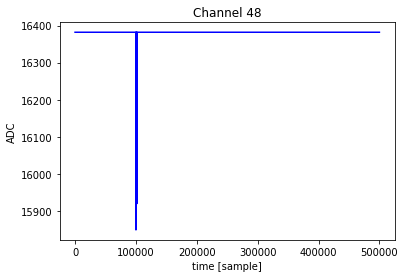

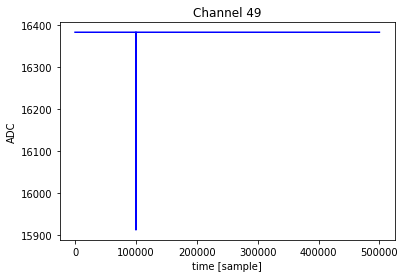

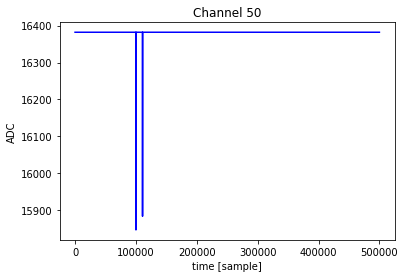

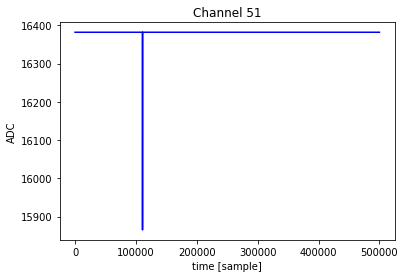

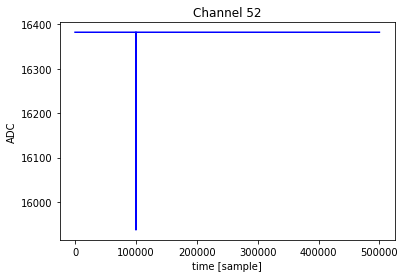

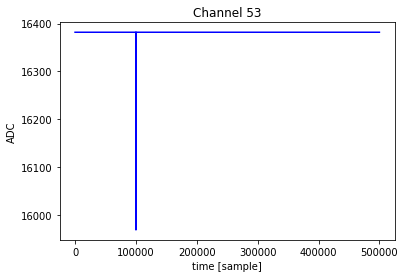

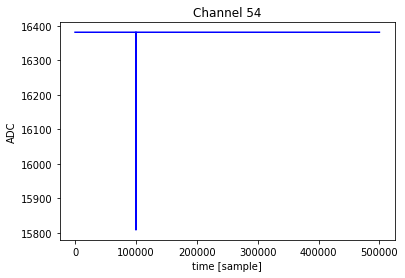

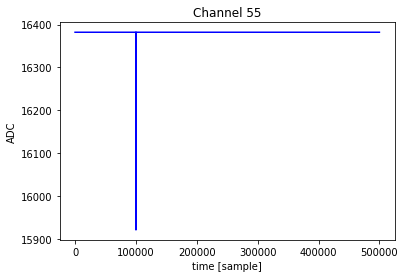

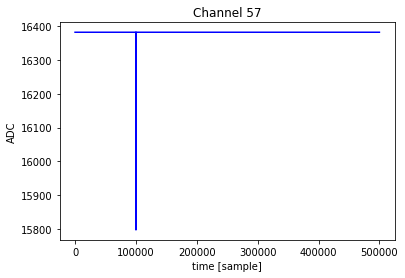

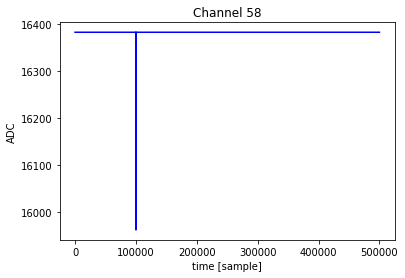

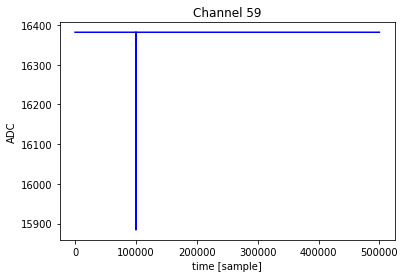

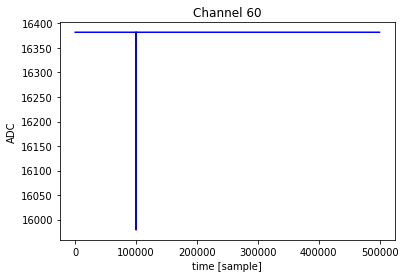

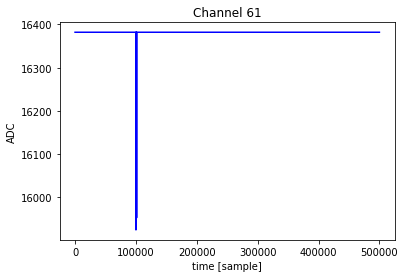

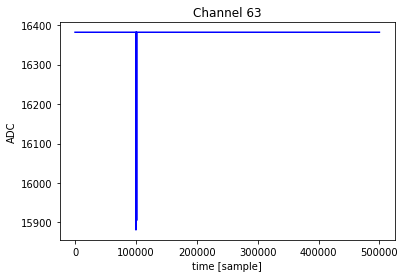

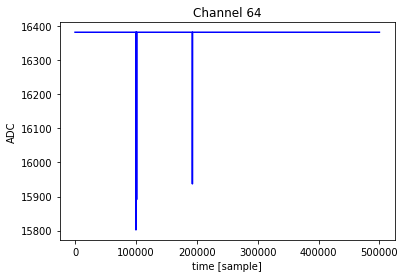

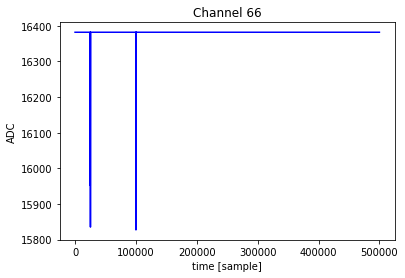

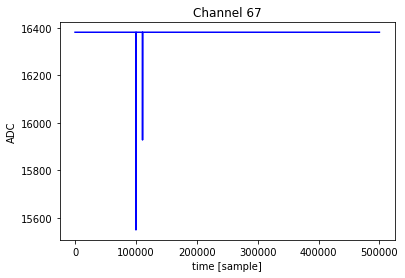

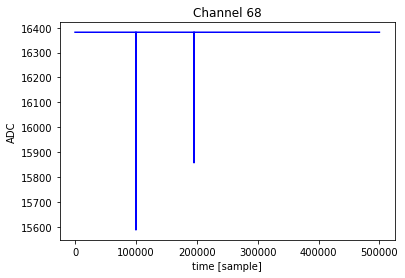

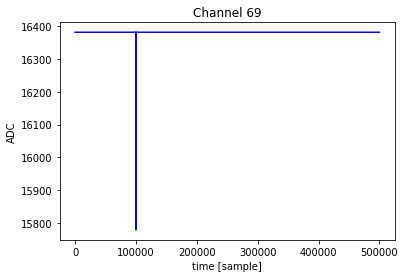

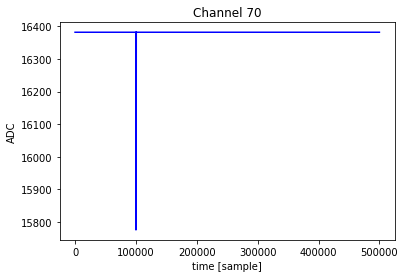

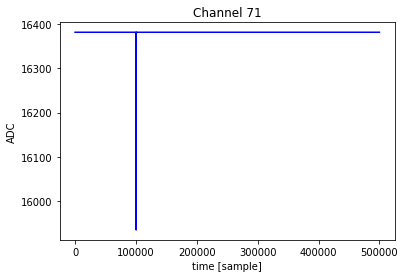

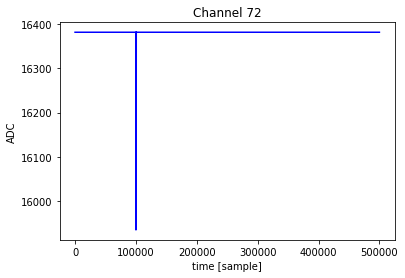

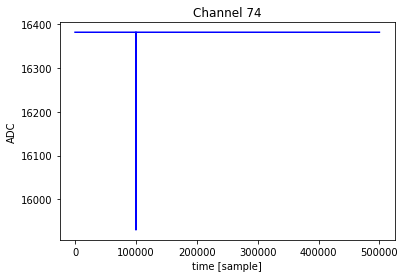

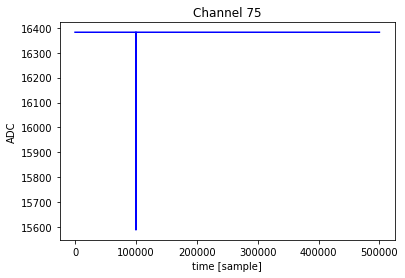

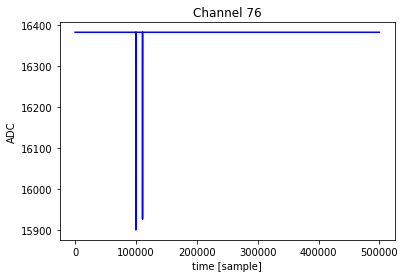

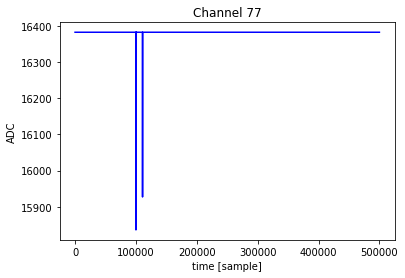

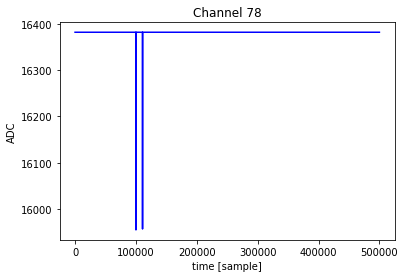

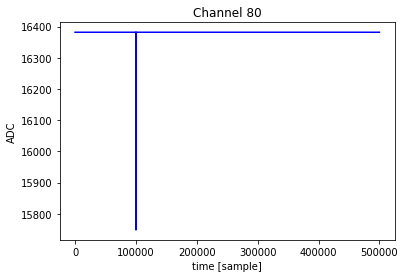

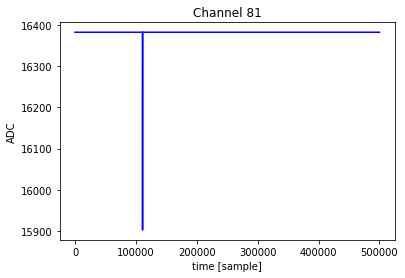

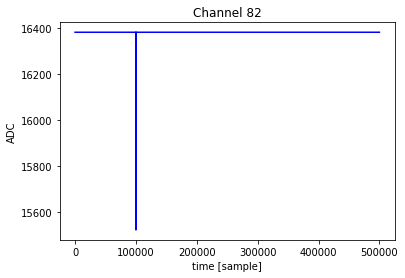

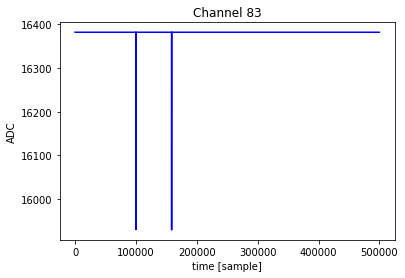

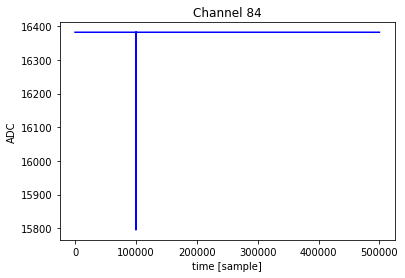

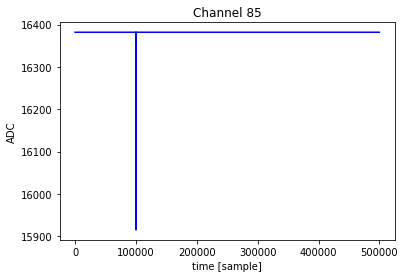

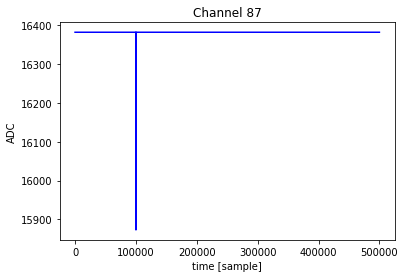

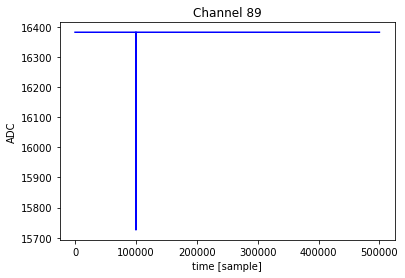

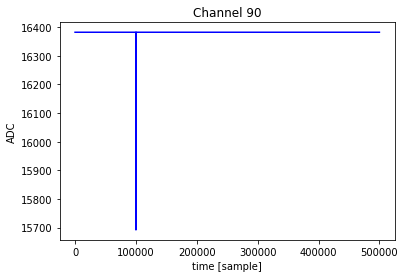

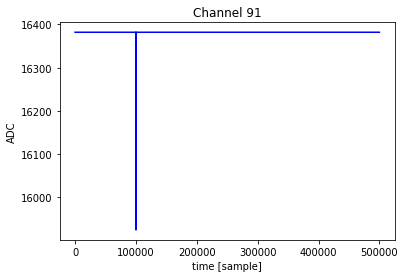

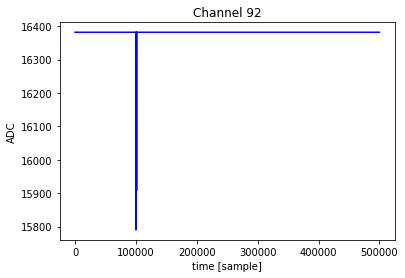

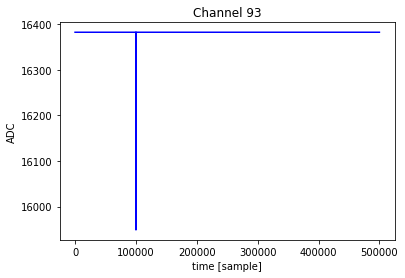

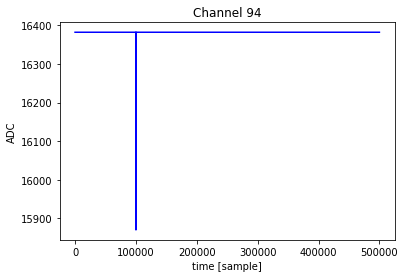

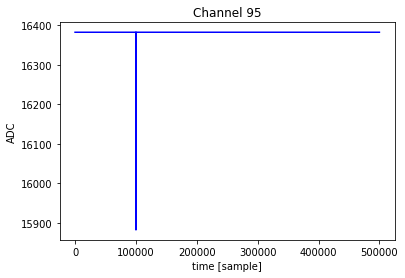

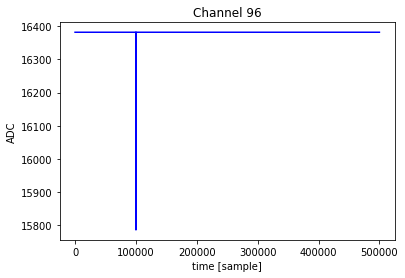

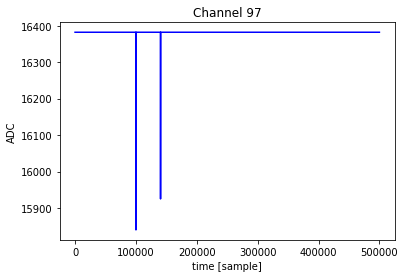

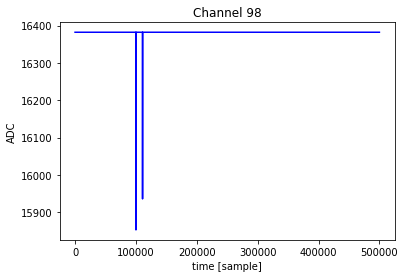

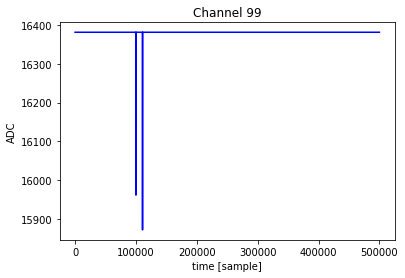

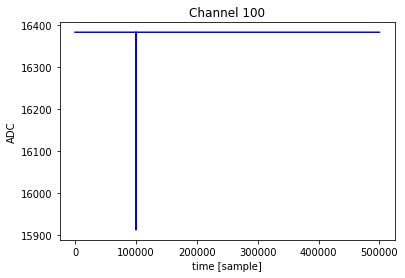

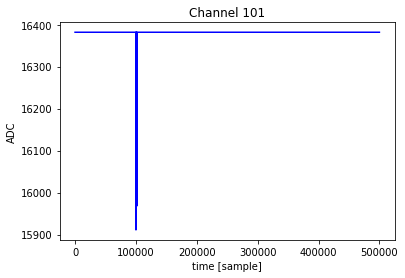

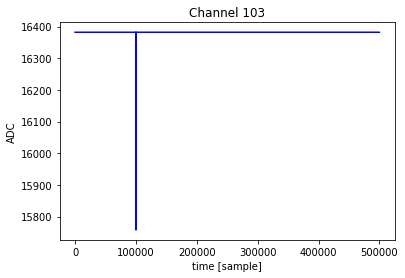

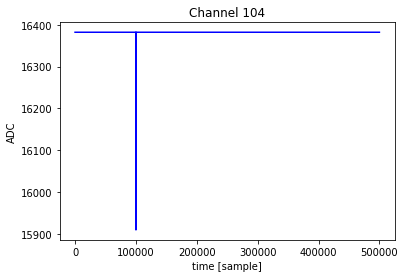

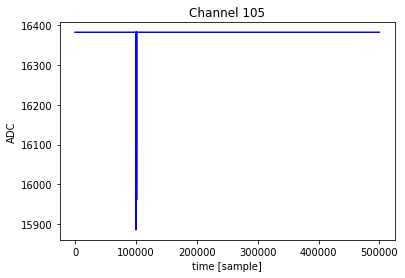

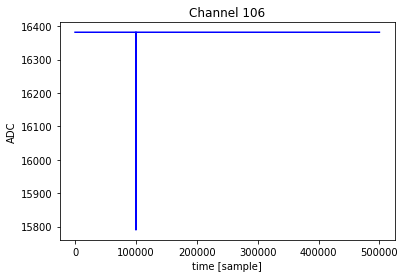

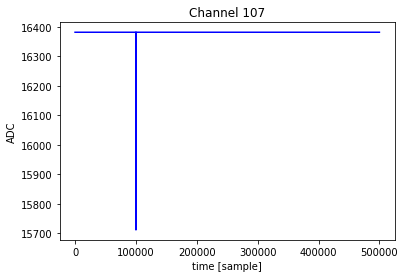

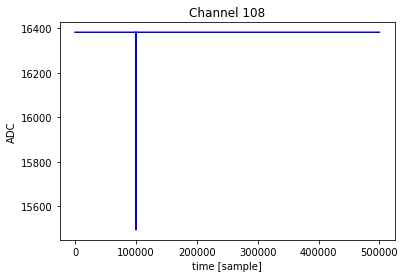

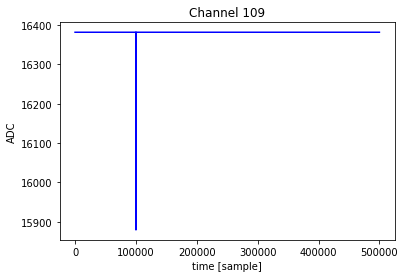

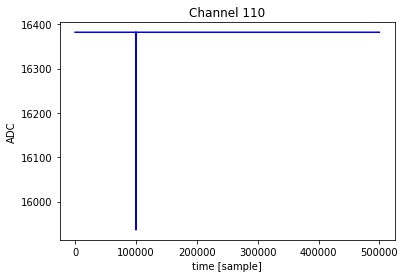

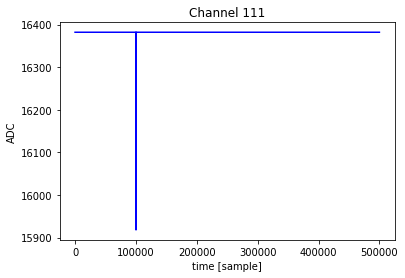

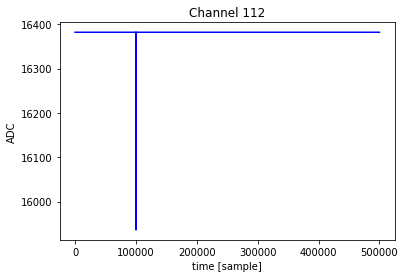

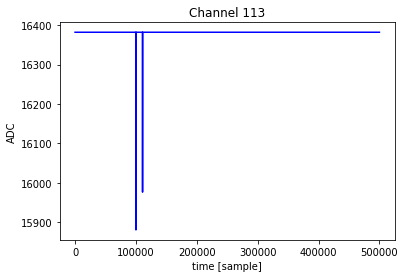

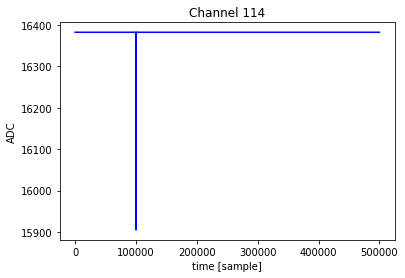

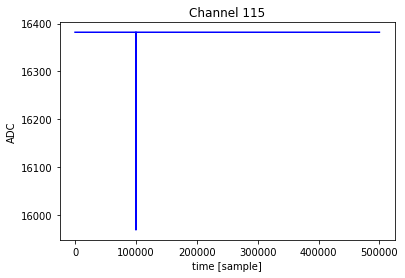

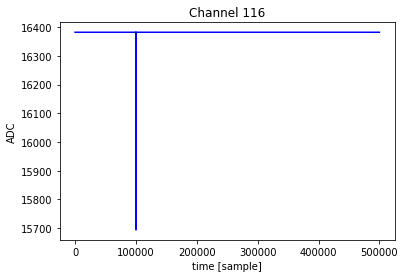

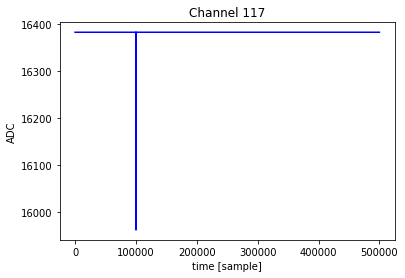

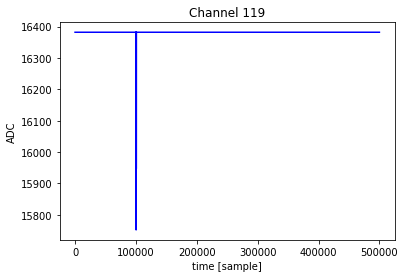

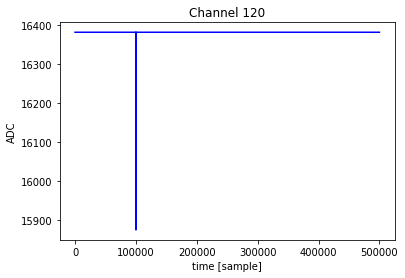

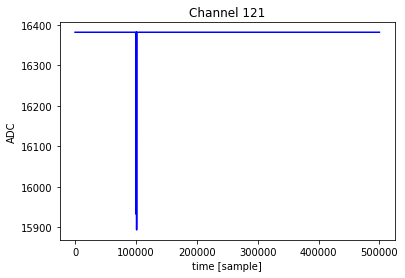

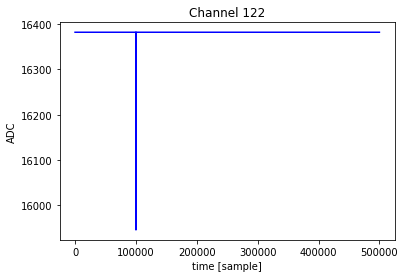

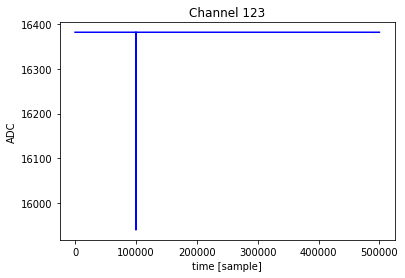

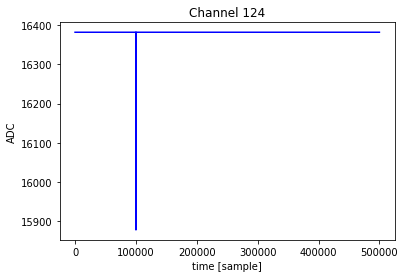

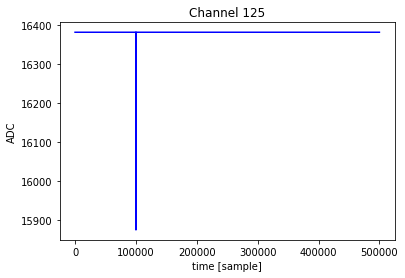

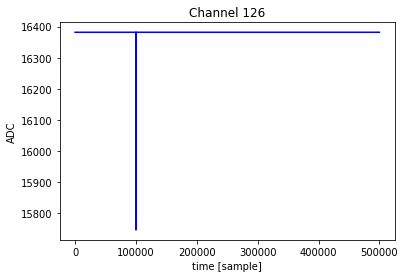

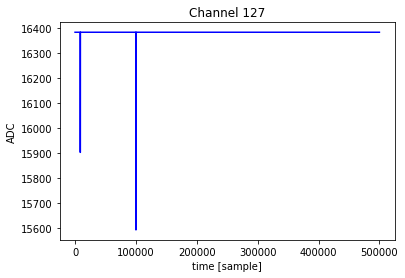

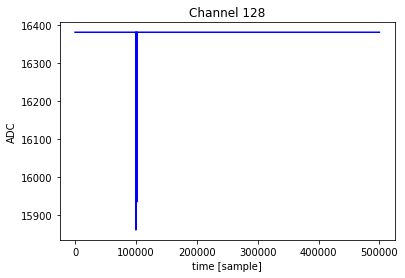

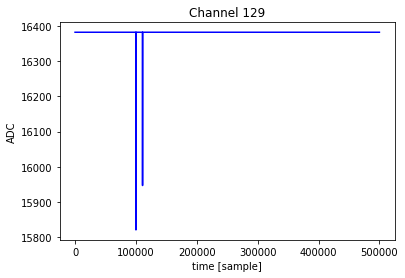

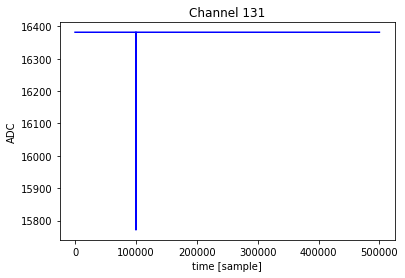

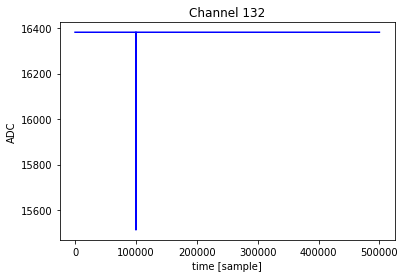

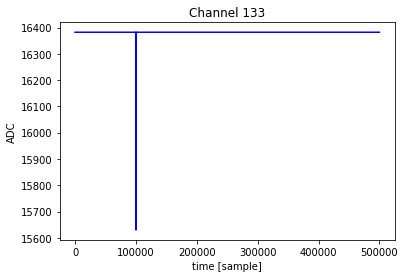

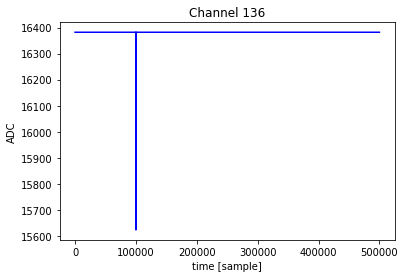

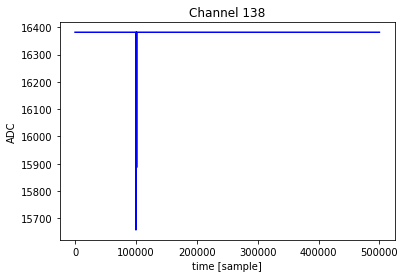

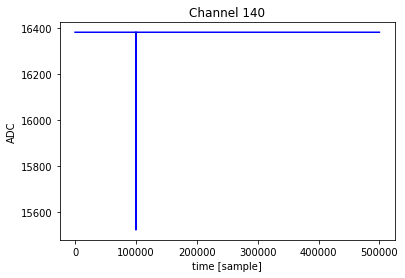

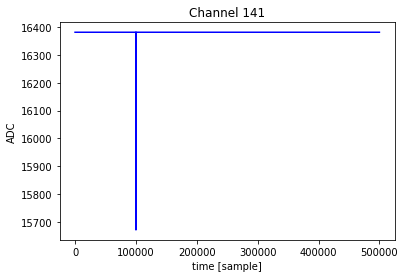

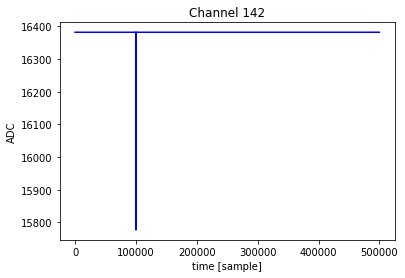

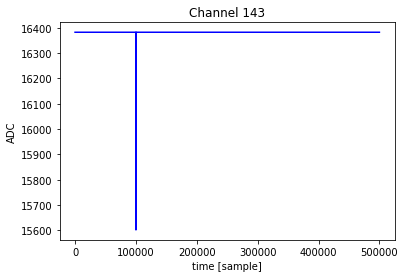

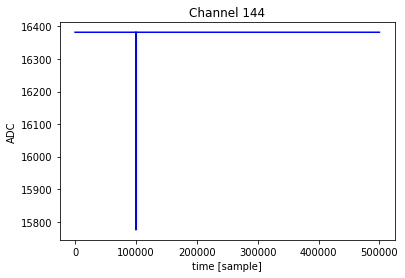

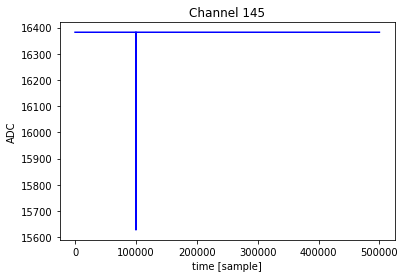

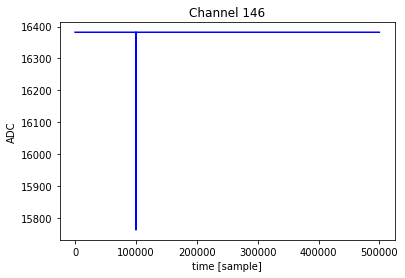

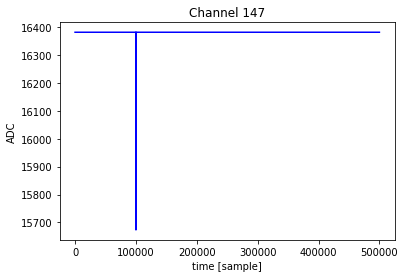

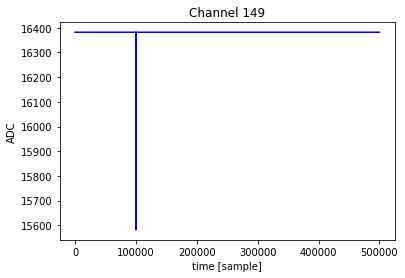

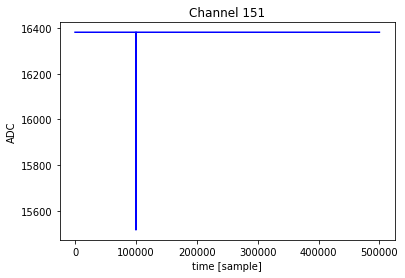

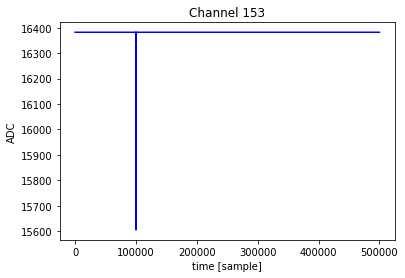

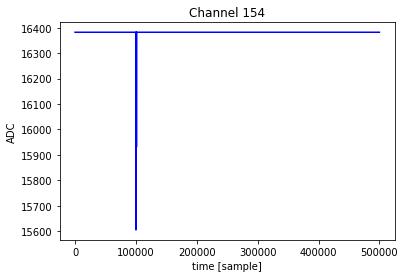

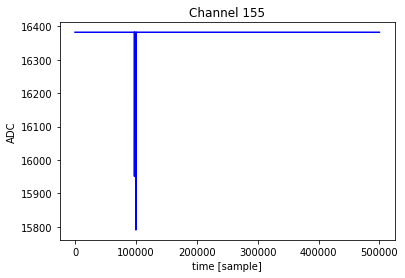

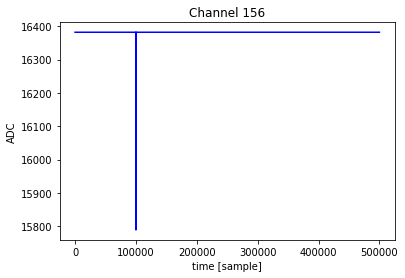

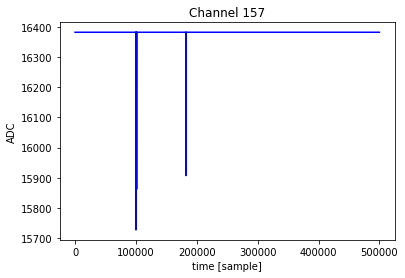

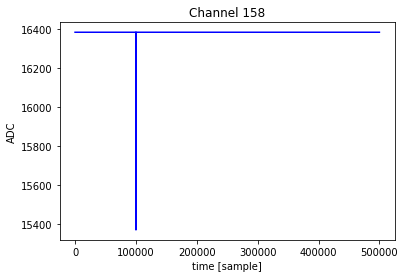

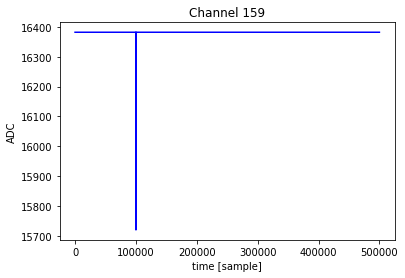

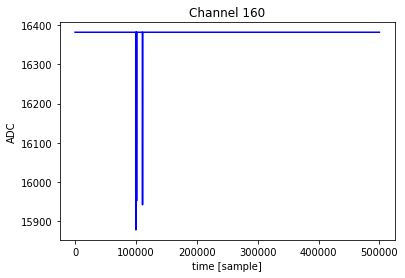

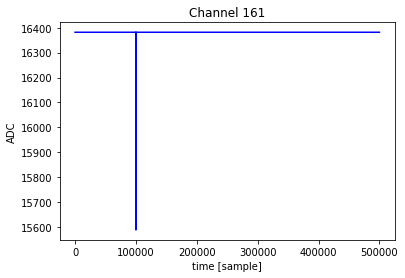

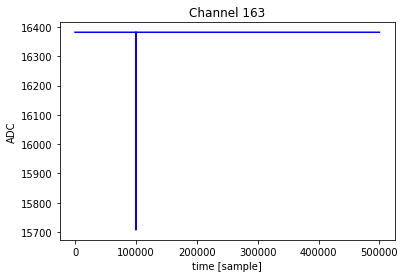

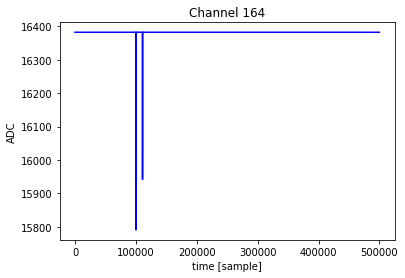

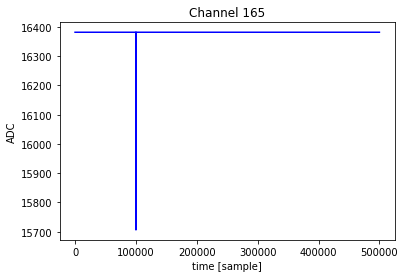

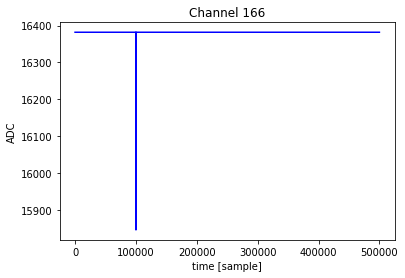

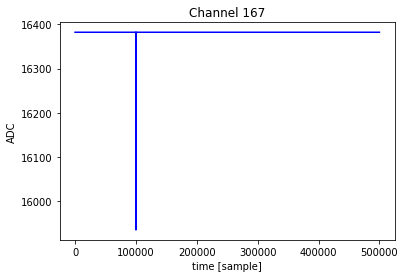

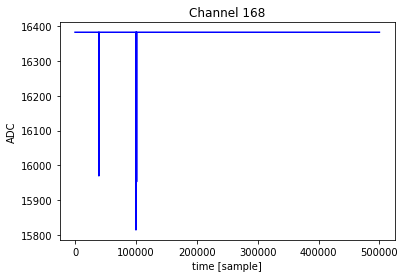

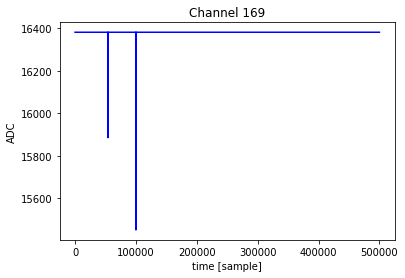

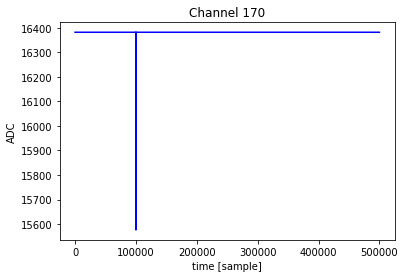

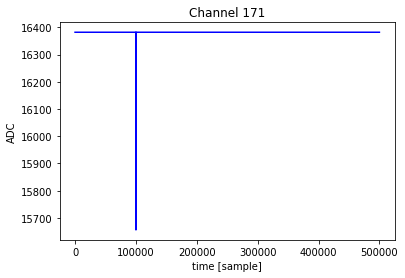

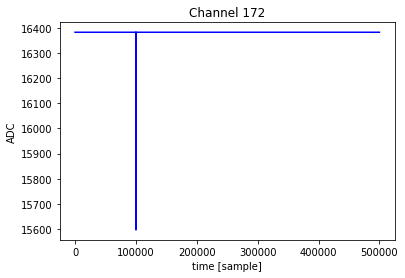

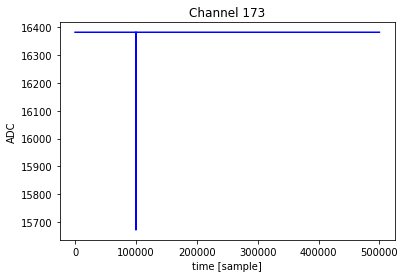

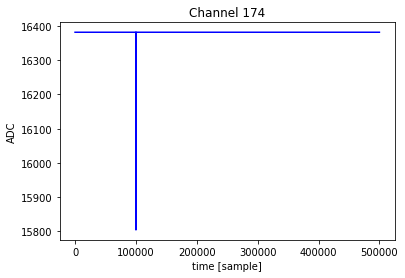

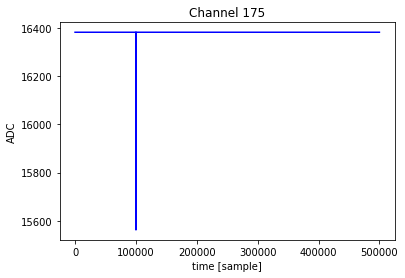

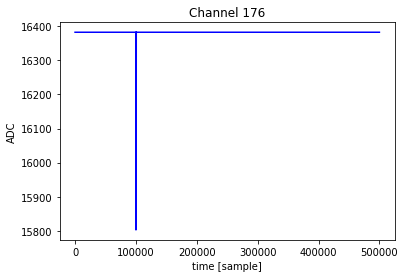

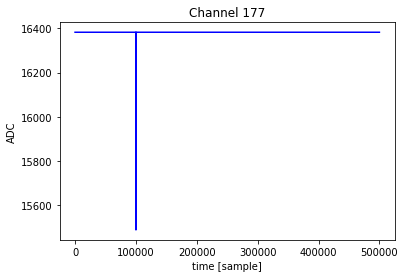

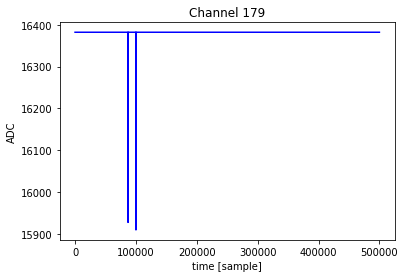

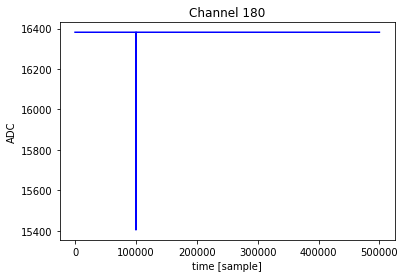

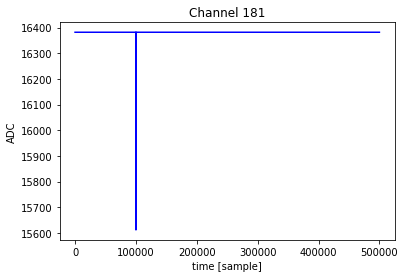

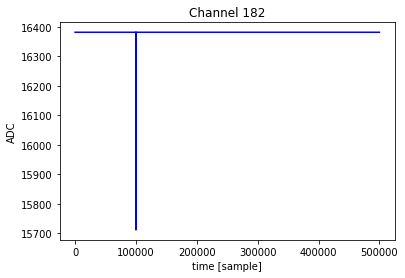

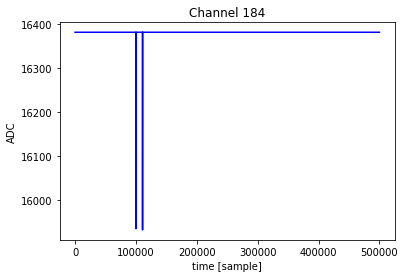

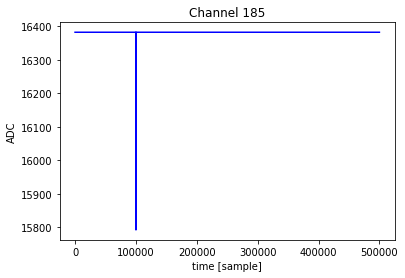

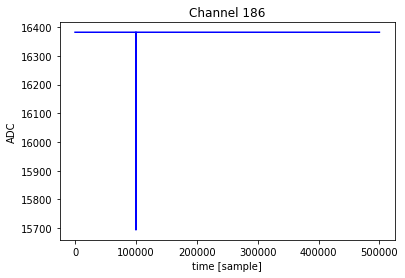

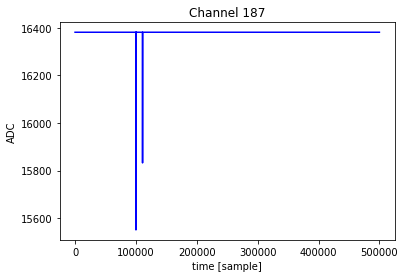

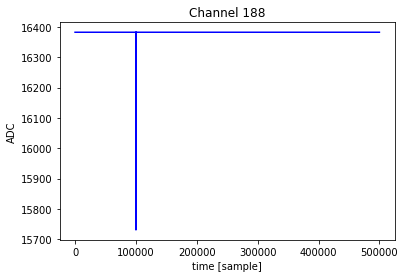

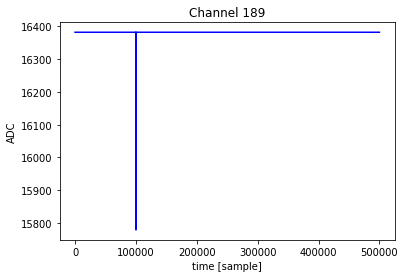

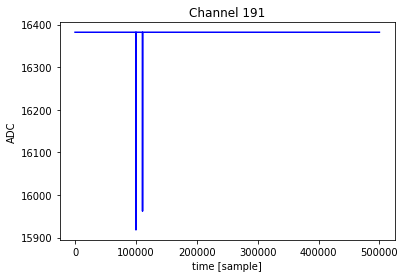

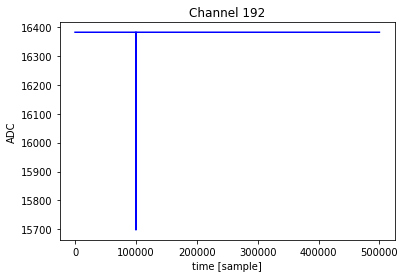

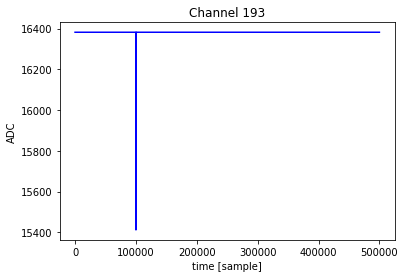

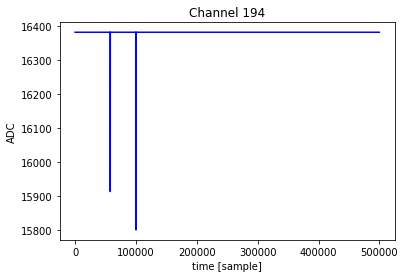

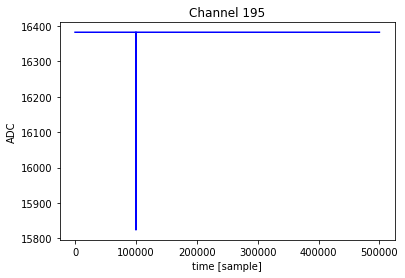

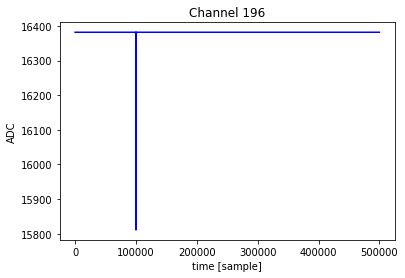

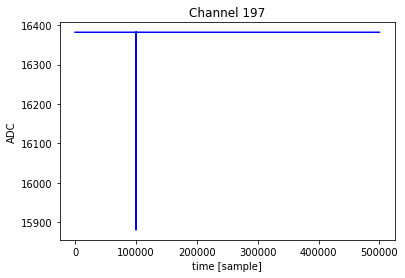

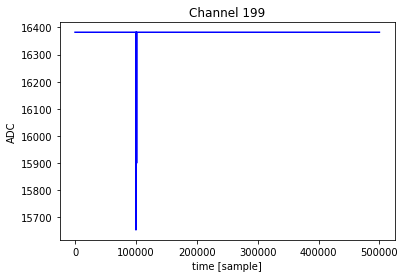

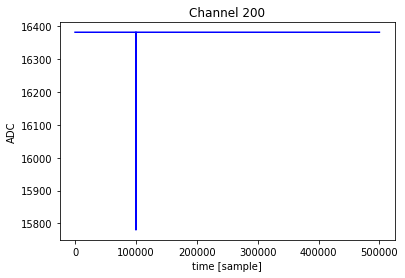

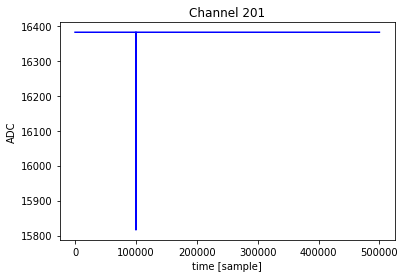

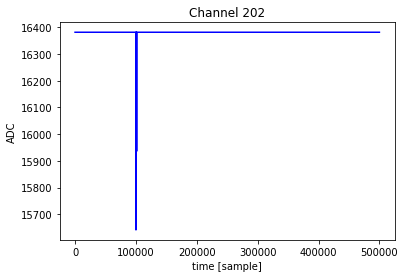

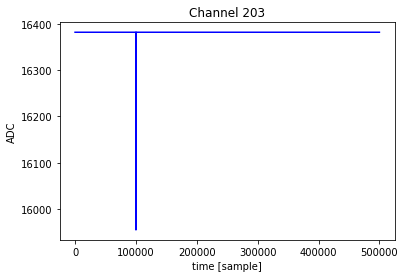

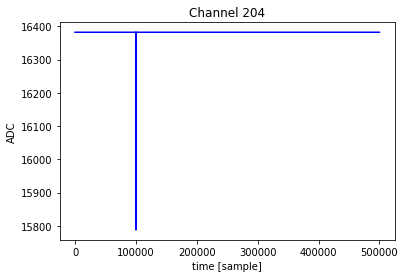

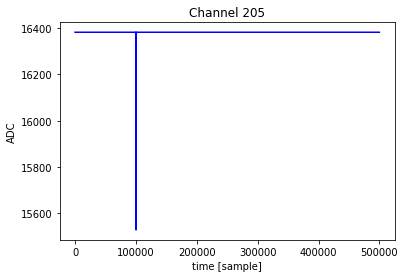

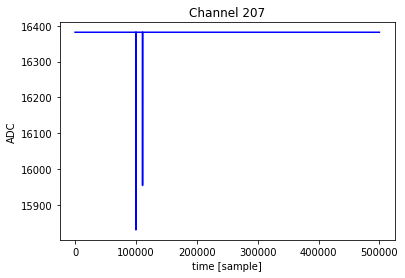

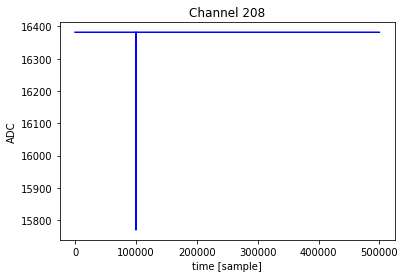

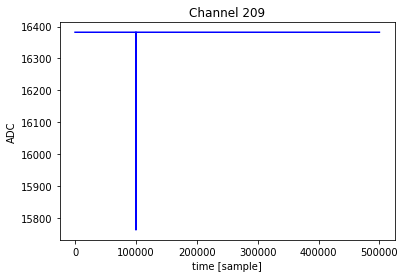

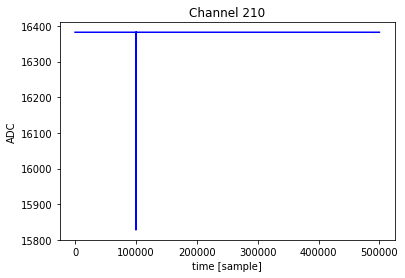

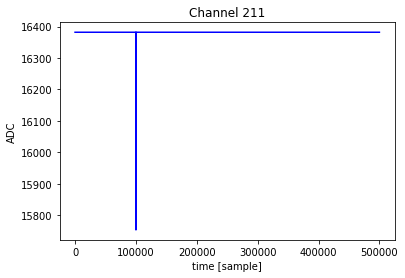

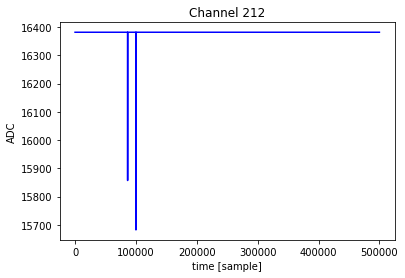

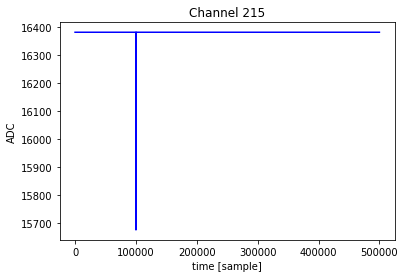

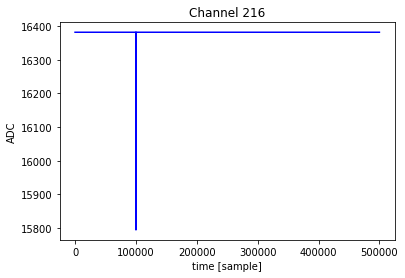

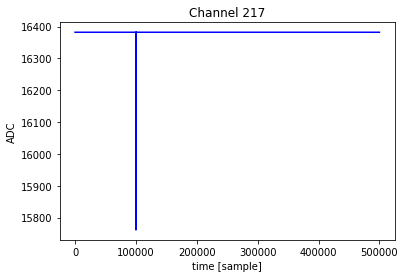

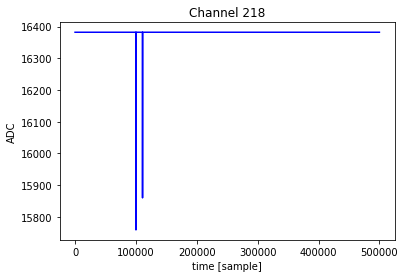

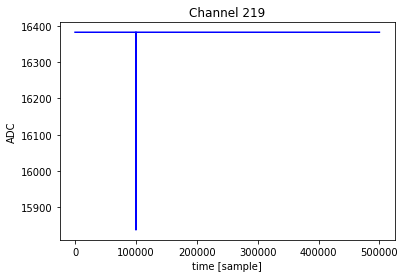

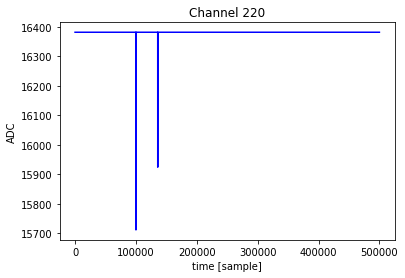

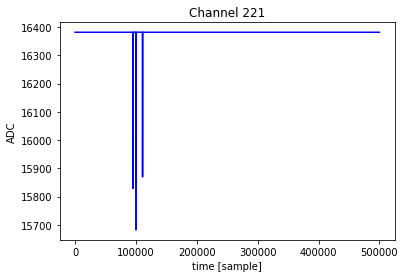

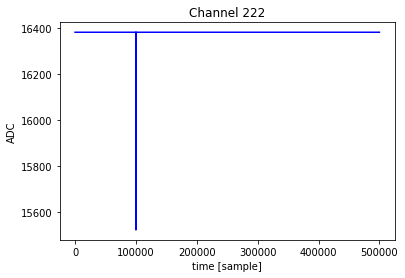

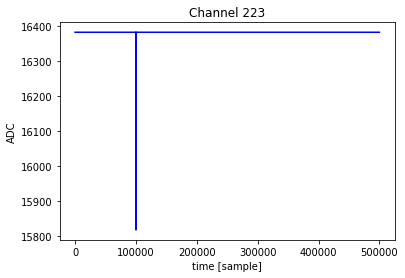

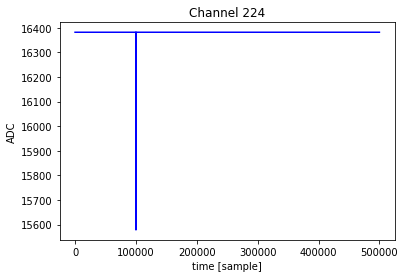

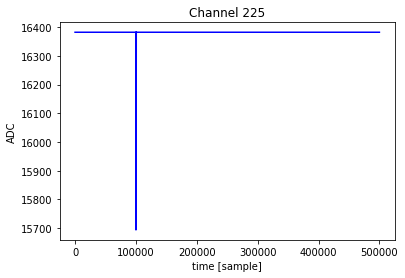

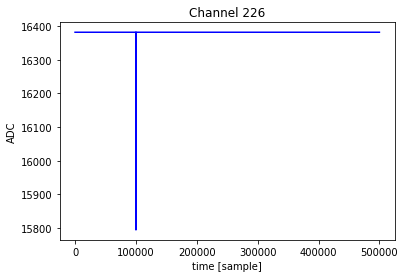

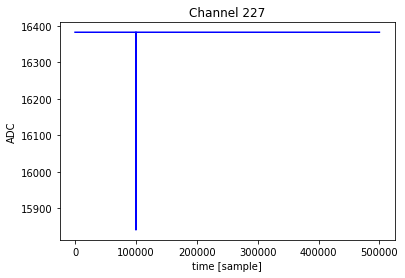

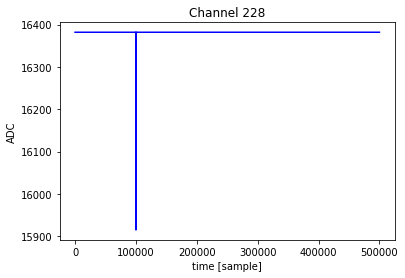

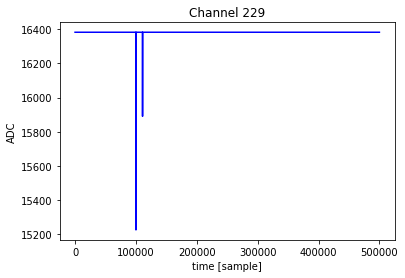

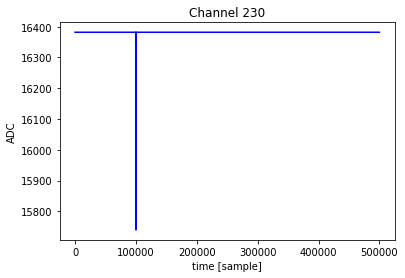

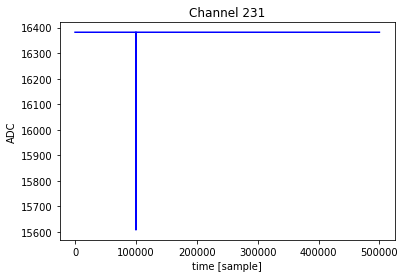

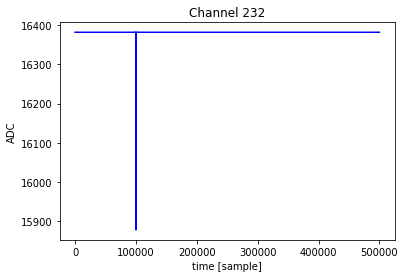

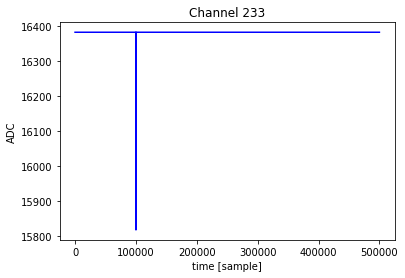

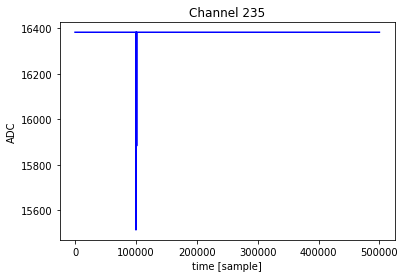

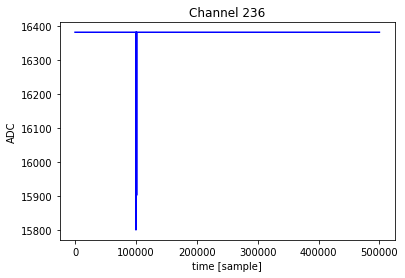

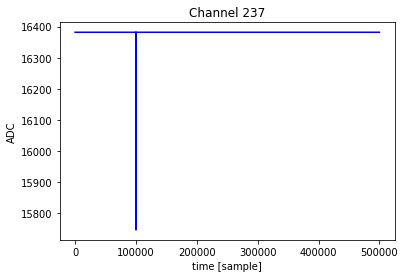

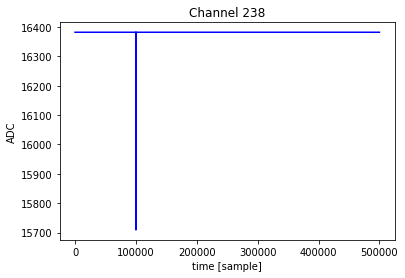

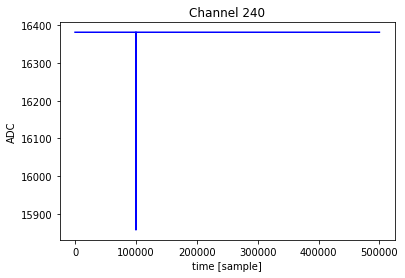

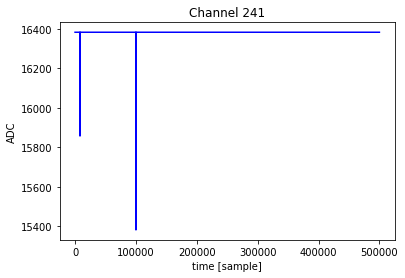

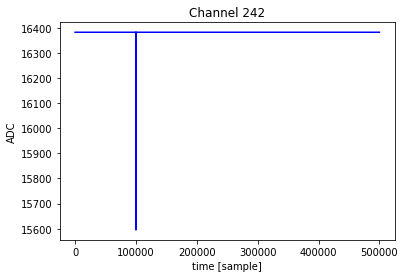

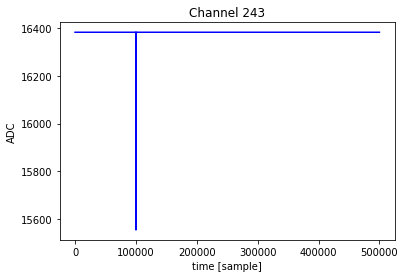

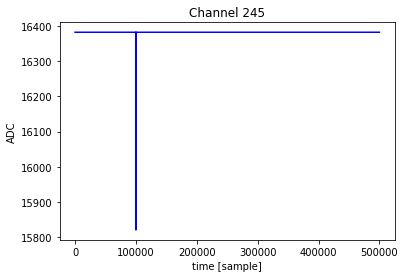

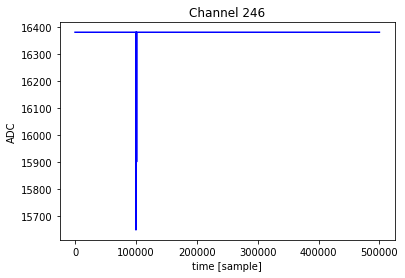

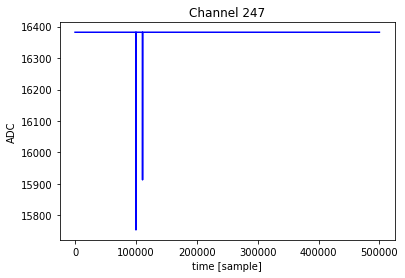

In [11]:


#Plot the two channels
#%matplotlib inline

for channel in Input[2]:
    print(channel)
    fig, ax = plt.subplots()
    ax.plot(Input[0], Input[1][channel], label='Channel' + str(channel), color = 'blue')
    ax.set_ylabel("ADC")
    ax.set_xlabel("time [sample]")
    ax.set_title('Channel ' + str(channel))
    fig.savefig('NewWaveform_test/Channel' + str(channel)+'.png', dpi = 200)